# Quora_Question_Pairs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re
from bs4 import BeautifulSoup


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df=df.sample(30000)

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 386434 to 226844
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [7]:
#missing values
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
#duplicate rows
new_df.duplicated().sum()

0

is_duplicate
0    18961
1    11039
Name: count, dtype: int64
is_duplicate
0    63.203333
1    36.796667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

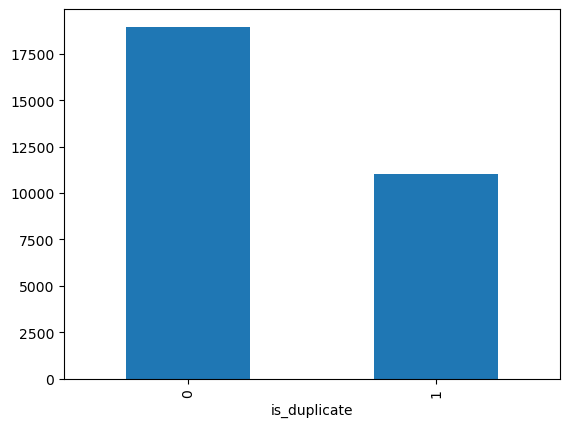

In [9]:
#Distribution of duplicate and non duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated Questions
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print("Number of unique questions", np.unique(qid).shape[0])
x=qid.value_counts()>1
print("Number of questions getting repeated", x[x].shape[0])

Number of unique questions 55442
Number of questions getting repeated 3412


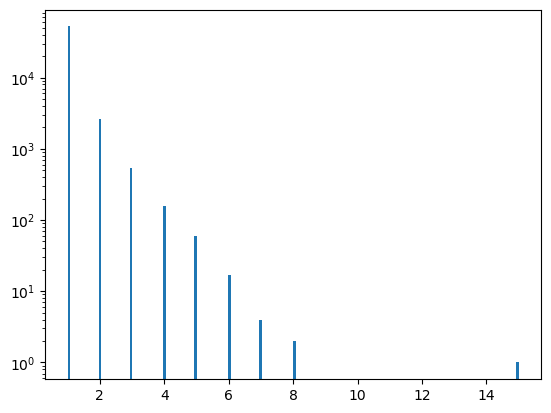

In [11]:
#Repeatd questions histogram

plt.hist(qid.value_counts().values , bins=160)
plt.yscale("log")
plt.show()

In [12]:
ques_df=new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
386434,How much does a non profit company have?,How do I overcome the language barrier on the ...
366190,What are the disadvantages of hiring foreign w...,What are the advantages of hiring foreign work...
185988,Is iPhone 7 worth buying ?,My opinion is iPhone 7 isn't worth the upgrade...
131323,Why did Aishwarya Rai marry Abhishek Bachchan?,Is Aishwarya Rai Bachchan pregnant again?
258015,"What are the health effects, if any, of ceasin...",What are the health effects of light drinking?


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions= list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr =np.vsplit(cv.fit_transform(questions).toarray(),2)

In [14]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [15]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
386434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185988,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
131323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(temp_df.iloc[:,0:-1].values, temp_df.iloc[:,-1].values, test_size=.2,random_state=2)

In [17]:
# model building

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.727

In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred =xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7211666666666666

In [19]:
# Feature Enginnering
# length of feature
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
386434,386434,518639,518640,How much does a non profit company have?,How do I overcome the language barrier on the ...,0,40,96
366190,366190,496361,124951,What are the disadvantages of hiring foreign w...,What are the advantages of hiring foreign work...,0,53,50
185988,185988,205626,125340,Is iPhone 7 worth buying ?,My opinion is iPhone 7 isn't worth the upgrade...,1,26,66
131323,131323,59605,210585,Why did Aishwarya Rai marry Abhishek Bachchan?,Is Aishwarya Rai Bachchan pregnant again?,0,46,41
258015,258015,150952,373455,"What are the health effects, if any, of ceasin...",What are the health effects of light drinking?,0,62,46


In [21]:
# Count Number of Words
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
386434,386434,518639,518640,How much does a non profit company have?,How do I overcome the language barrier on the ...,0,40,96,8,16
366190,366190,496361,124951,What are the disadvantages of hiring foreign w...,What are the advantages of hiring foreign work...,0,53,50,8,8
185988,185988,205626,125340,Is iPhone 7 worth buying ?,My opinion is iPhone 7 isn't worth the upgrade...,1,26,66,6,13
131323,131323,59605,210585,Why did Aishwarya Rai marry Abhishek Bachchan?,Is Aishwarya Rai Bachchan pregnant again?,0,46,41,7,6
258015,258015,150952,373455,"What are the health effects, if any, of ceasin...",What are the health effects of light drinking?,0,62,46,11,8


In [22]:
# fetching common words

def common_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [23]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
386434,386434,518639,518640,How much does a non profit company have?,How do I overcome the language barrier on the ...,0,40,96,8,16,1
366190,366190,496361,124951,What are the disadvantages of hiring foreign w...,What are the advantages of hiring foreign work...,0,53,50,8,8,7
185988,185988,205626,125340,Is iPhone 7 worth buying ?,My opinion is iPhone 7 isn't worth the upgrade...,1,26,66,6,13,4
131323,131323,59605,210585,Why did Aishwarya Rai marry Abhishek Bachchan?,Is Aishwarya Rai Bachchan pregnant again?,0,46,41,7,6,2
258015,258015,150952,373455,"What are the health effects, if any, of ceasin...",What are the health effects of light drinking?,0,62,46,11,8,5


In [24]:
#Total words

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
    return (len(w1) + len(w2))

In [25]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
386434,386434,518639,518640,How much does a non profit company have?,How do I overcome the language barrier on the ...,0,40,96,8,16,1,23
366190,366190,496361,124951,What are the disadvantages of hiring foreign w...,What are the advantages of hiring foreign work...,0,53,50,8,8,7,16
185988,185988,205626,125340,Is iPhone 7 worth buying ?,My opinion is iPhone 7 isn't worth the upgrade...,1,26,66,6,13,4,19
131323,131323,59605,210585,Why did Aishwarya Rai marry Abhishek Bachchan?,Is Aishwarya Rai Bachchan pregnant again?,0,46,41,7,6,2,13
258015,258015,150952,373455,"What are the health effects, if any, of ceasin...",What are the health effects of light drinking?,0,62,46,11,8,5,19


In [26]:
# Word_share

new_df['word_share'] =round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
386434,386434,518639,518640,How much does a non profit company have?,How do I overcome the language barrier on the ...,0,40,96,8,16,1,23,0.04
366190,366190,496361,124951,What are the disadvantages of hiring foreign w...,What are the advantages of hiring foreign work...,0,53,50,8,8,7,16,0.44
185988,185988,205626,125340,Is iPhone 7 worth buying ?,My opinion is iPhone 7 isn't worth the upgrade...,1,26,66,6,13,4,19,0.21
131323,131323,59605,210585,Why did Aishwarya Rai marry Abhishek Bachchan?,Is Aishwarya Rai Bachchan pregnant again?,0,46,41,7,6,2,13,0.15
258015,258015,150952,373455,"What are the health effects, if any, of ceasin...",What are the health effects of light drinking?,0,62,46,11,8,5,19,0.26


# Analysis on new features

minimum characters 1
maximum characters 345
average num of characters 59


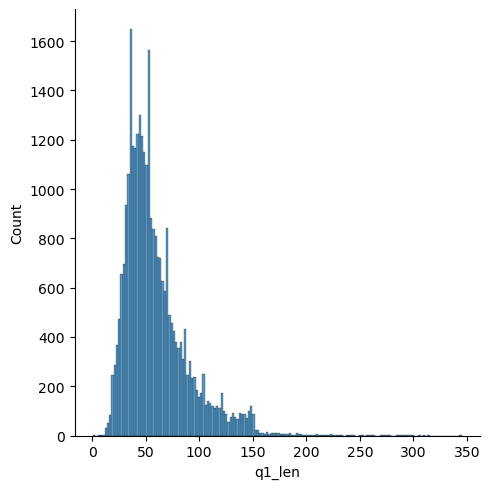

In [27]:
sns.displot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

minimum characters 5
maximum characters 1151
average num of characters 59


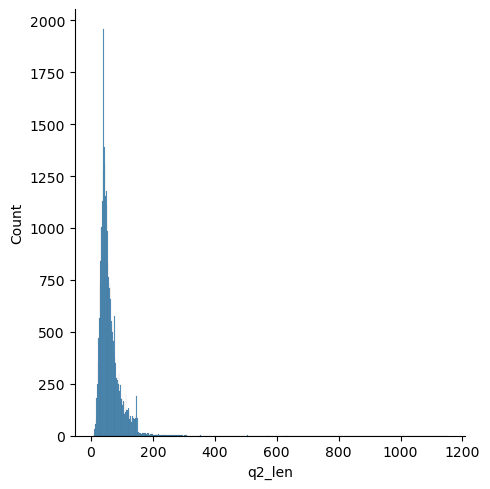

In [28]:
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average num of characters', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 68
average num of words 10


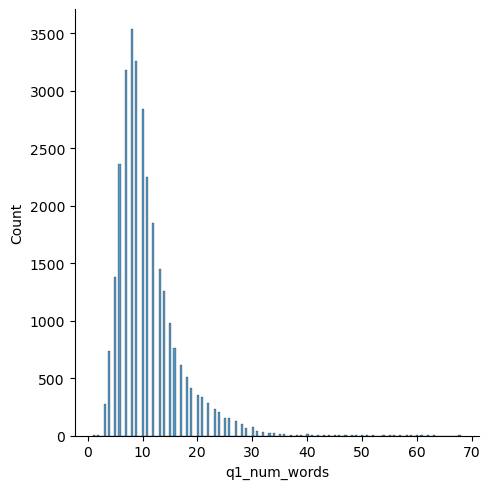

In [29]:
# find number of words in questions

sns.displot(new_df['q1_num_words'])
print("minimum words", new_df['q1_num_words'].min())
print('maximum words', new_df['q1_num_words'].max())
print("average num of words", int(new_df['q1_num_words'].mean()))

minimum words 2
maximum words 237
average num of words 11


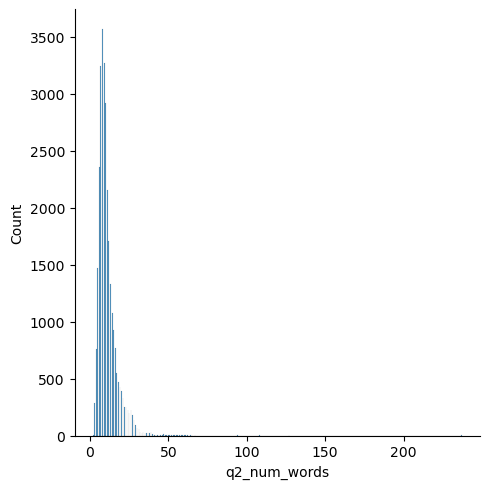

In [30]:
sns.displot(new_df['q2_num_words'])
print("minimum words", new_df['q2_num_words'].min())
print('maximum words', new_df['q2_num_words'].max())
print("average num of words", int(new_df['q2_num_words'].mean()))

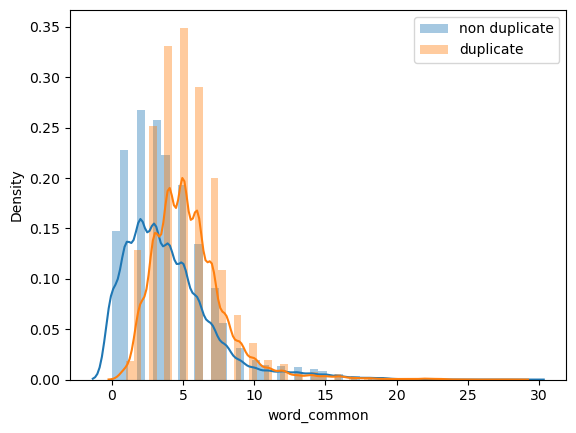

In [31]:
# Analysis on word_common
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

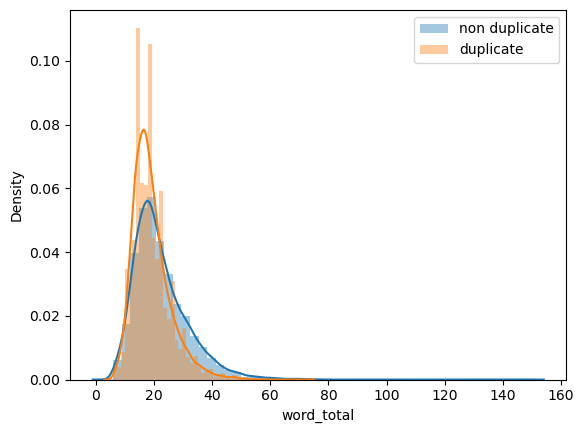

In [32]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

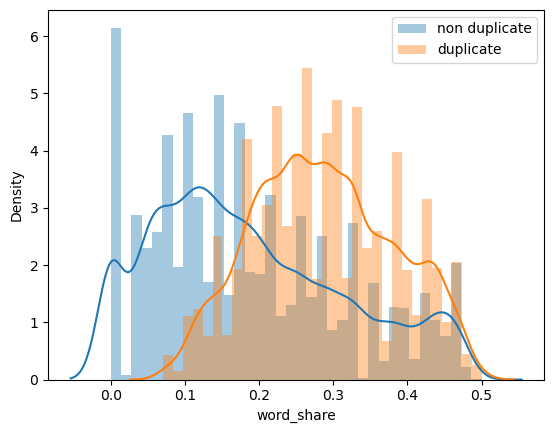

In [33]:
# word share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [34]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

,question1,question2
386434,How much does a non profit company have?,How do I overcome the language barrier on the ...
366190,What are the disadvantages of hiring foreign w...,What are the advantages of hiring foreign work...
185988,Is iPhone 7 worth buying ?,My opinion is iPhone 7 isn't worth the upgrade...
131323,Why did Aishwarya Rai marry Abhishek Bachchan?,Is Aishwarya Rai Bachchan pregnant again?
258015,"What are the health effects, if any, of ceasin...",What are the health effects of light drinking?


In [35]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1', 'question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
386434,0,40,96,8,16,1,23,0.04
366190,0,53,50,8,8,7,16,0.44
185988,1,26,66,6,13,4,19,0.21
131323,0,46,41,7,6,2,13,0.15
258015,0,62,46,11,8,5,19,0.26


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts

questions =list(ques_df['question1']) +list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr, q2_arr= np.vsplit(cv.fit_transform(questions).toarray(),2)

In [37]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)
temp_df=pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [38]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
386434,0,40,96,8,16,1,23,0.04,0,0,...,0,0,0,0,0,0,0,0,0,0
366190,0,53,50,8,8,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
185988,1,26,66,6,13,4,19,0.21,0,0,...,0,0,1,0,0,0,0,0,0,0
131323,0,46,41,7,6,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
258015,0,62,46,11,8,5,19,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=.2, random_state=20)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7745

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred= xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7706666666666667

# Data Preprocessing

In [42]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

     # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
     "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
     "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
     "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [43]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [44]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [45]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,40,96,8,16,1,23,0.04
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,53,50,8,8,7,16,0.44
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,26,66,6,13,4,19,0.21
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,46,41,7,6,2,13,0.15
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,62,46,11,8,5,19,0.26


In [46]:
# Feature Engineering on preprocess features

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [47]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,39,95,8,16,1,23,0.04
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,52,49,8,8,7,16,0.44
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,24,66,5,15,4,19,0.21
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,45,40,7,6,2,13,0.15
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,61,45,13,8,5,19,0.26


In [48]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [49]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,39,95,8,16,1,23,0.04
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,52,49,8,8,7,16,0.44
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,24,66,5,15,4,19,0.21
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,45,40,7,6,3,13,0.15
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,61,45,13,8,6,19,0.26


In [50]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [51]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,39,95,8,16,1,23,0.04
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,52,49,8,8,7,16,0.44
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,24,66,5,15,4,19,0.21
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,45,40,7,6,3,13,0.15
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,61,45,13,8,6,20,0.26


In [52]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,39,95,8,16,1,23,0.04
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,52,49,8,8,7,16,0.44
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,24,66,5,15,4,19,0.21
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,45,40,7,6,3,13,0.23
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,61,45,13,8,6,20,0.30


# Advanced Features
## 1. Token Features
- cwc_min: This is the ratio of the number of common words to the length of the smaller question
- cwc_max: This is the ratio of the number of common words to the length of the larger question
- csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
- ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
- last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
- first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
## 2. Length Based Features
- mean_len: Mean of the length of the two questions (number of words)
- abs_len_diff: Absolute difference between the length of the two questions (number of words)
- longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
## 3. Fuzzy Features
- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
- fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
- token_sort_ratio: token_sort_ratio from fuzzywuzzy
- token_set_ratio: token_set_ratio from fuzzywuzzy

In [53]:
# Advanced Features
# 1. Token Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [54]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [55]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,39,95,8,16,...,23,0.04,0.000000,0.000000,0.249994,0.166664,0.124998,0.062500,0.0,1.0
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,52,49,8,8,...,16,0.44,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,1.0,1.0
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,24,66,5,15,...,19,0.21,0.749981,0.499992,0.999900,0.142855,0.799984,0.285712,0.0,0.0
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,45,40,7,6,...,13,0.23,0.749981,0.599988,0.000000,0.000000,0.499992,0.428565,0.0,0.0
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,61,45,13,8,...,20,0.30,0.499988,0.499988,0.999975,0.571420,0.749991,0.545450,0.0,1.0


In [56]:
# 2. Length Based Features

import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [57]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [58]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,39,95,8,16,...,0.000000,0.249994,0.166664,0.124998,0.062500,0.0,1.0,8.0,12.0,0.100000
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,52,49,8,8,...,0.749981,0.999975,0.999975,0.874989,0.874989,1.0,1.0,0.0,8.0,0.720000
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,24,66,5,15,...,0.499992,0.999900,0.142855,0.799984,0.285712,0.0,0.0,9.0,9.5,0.480000
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,45,40,7,6,...,0.599988,0.000000,0.000000,0.499992,0.428565,0.0,0.0,1.0,6.5,0.365854
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,61,45,13,8,...,0.499988,0.999975,0.571420,0.749991,0.545450,0.0,1.0,3.0,9.5,0.608696


In [59]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [60]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [61]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
386434,386434,518639,518640,how much does a non profit company have,how do i overcome the language barrier on the ...,0,39,95,8,16,...,0.062500,0.0,1.0,8.0,12.0,0.100000,30,41,36,37
366190,366190,496361,124951,what are the disadvantages of hiring foreign w...,what are the advantages of hiring foreign workers,0,52,49,8,8,...,0.874989,1.0,1.0,0.0,8.0,0.720000,97,94,89,97
185988,185988,205626,125340,is iphone 7 worth buying,my opinion is iphone 7 is not worth the upgrad...,1,24,66,5,15,...,0.285712,0.0,0.0,9.0,9.5,0.480000,49,71,40,83
131323,131323,59605,210585,why did aishwarya rai marry abhishek bachchan,is aishwarya rai bachchan pregnant again,0,45,40,7,6,...,0.428565,0.0,0.0,1.0,6.5,0.365854,56,60,68,71
258015,258015,150952,373455,what are the health effects if any of ceasin...,what are the health effects of light drinking,0,61,45,13,8,...,0.545450,0.0,1.0,3.0,9.5,0.608696,64,71,71,80


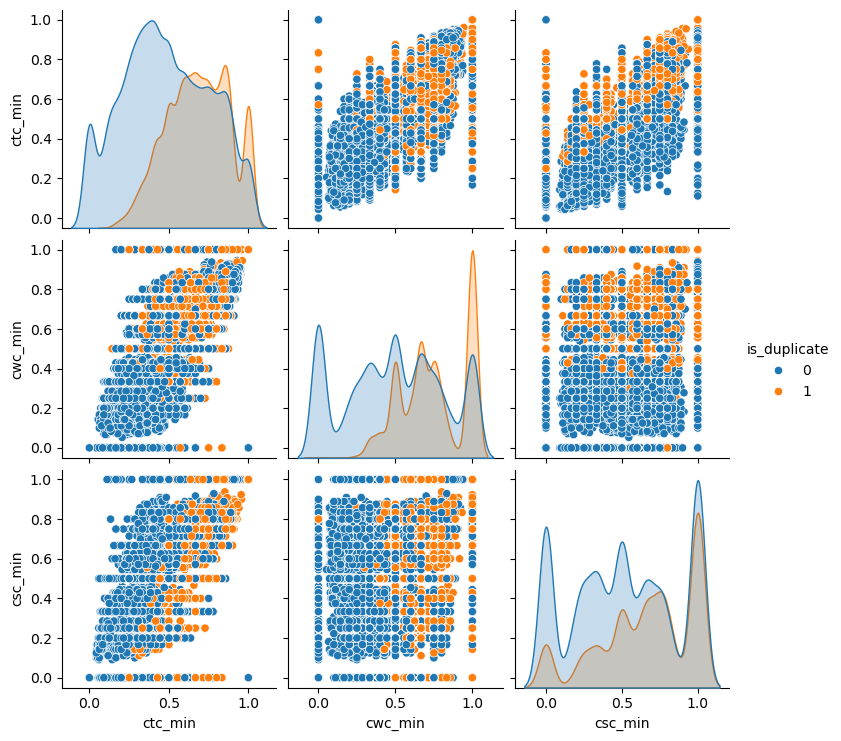

In [62]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

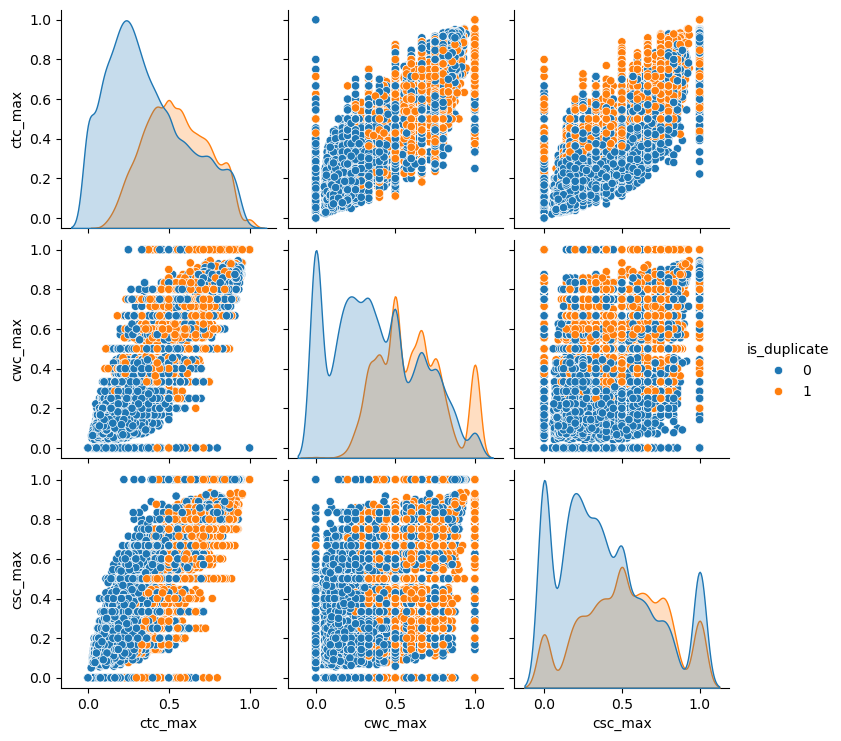

In [63]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

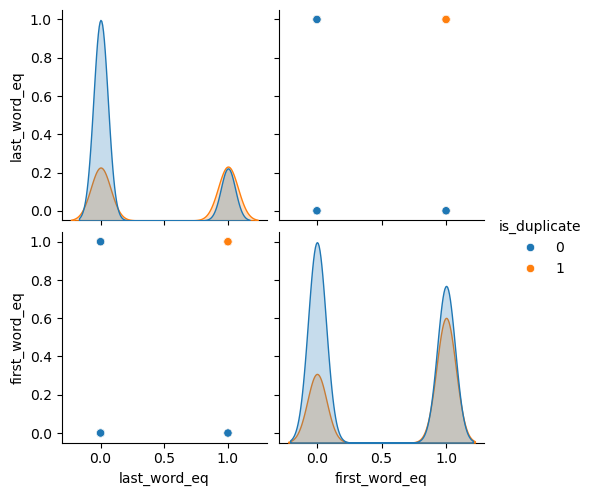

In [64]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

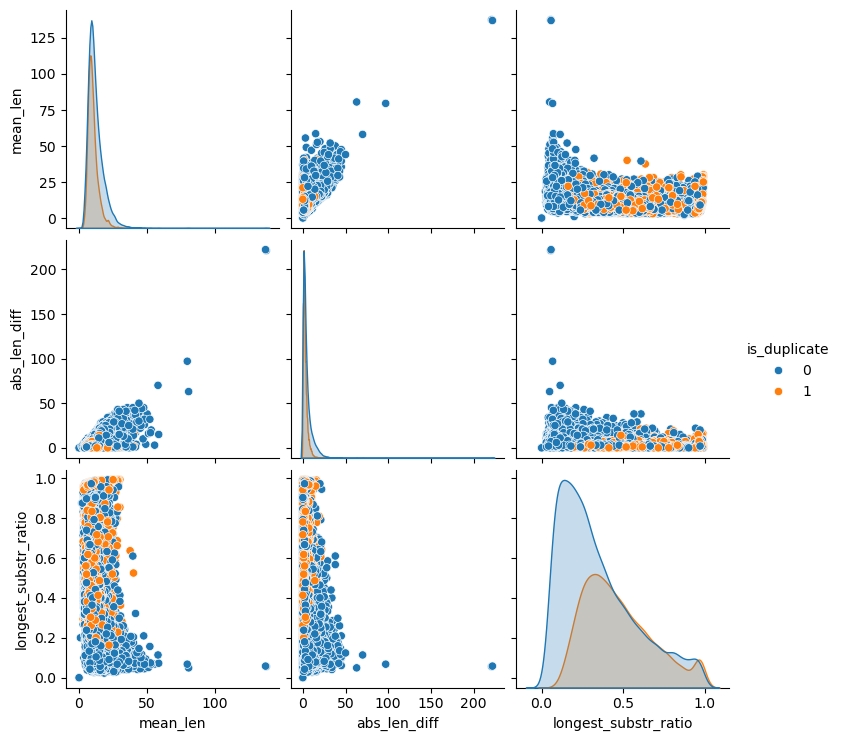

In [65]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

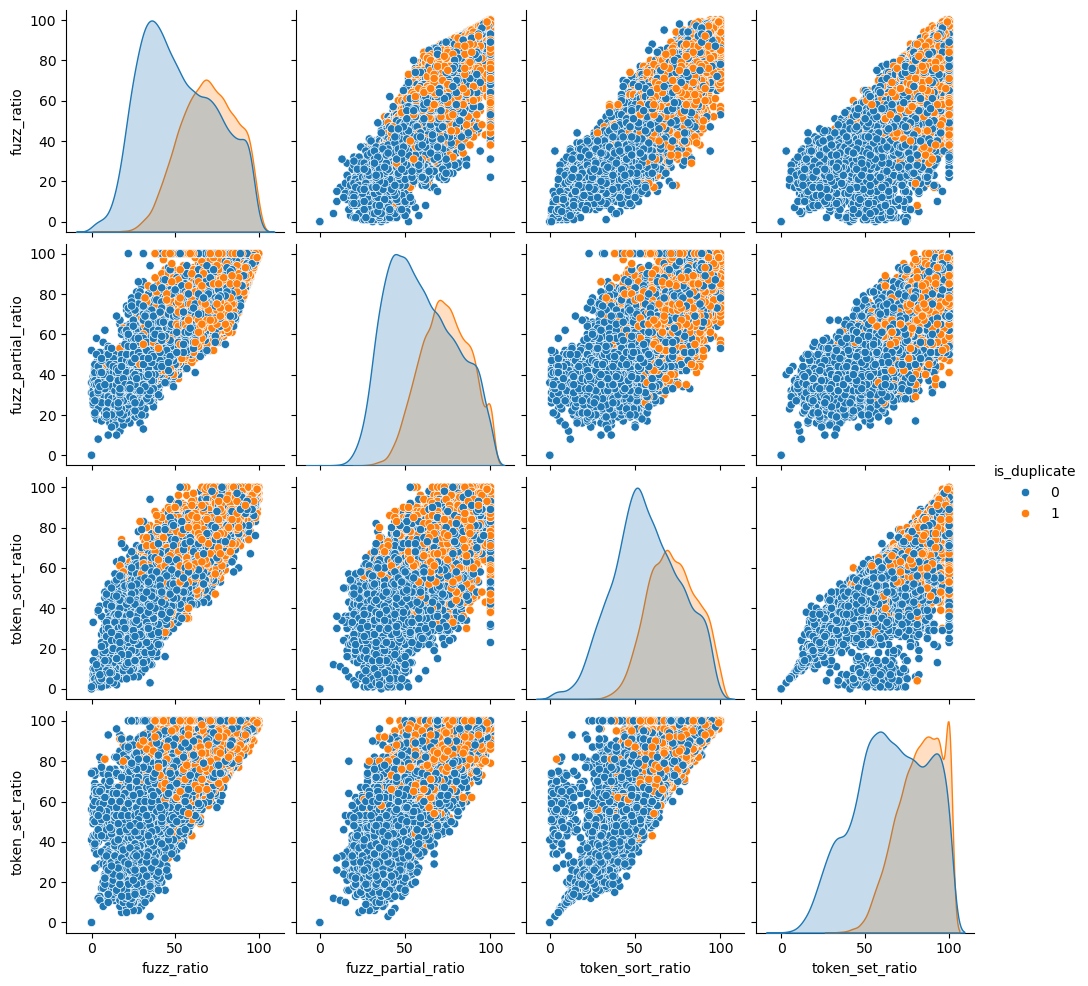

In [66]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [67]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [68]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.158s...
[t-SNE] Computed neighbors for 30000 samples in 7.869s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[t-SNE] Iteration 50: error = 109.8501663, gradient norm = 0.0250321 (50 iterations in 7.956s)
[t-SNE] Iteration 100: error = 88.9585419, gradient norm = 0.0076758 (50 iterations in 7.121s)
[t-SNE] Iteration 150: error = 85.0679855, gradient norm = 0.0041350 (50 iterations in 7.053s)
[t-SNE] Iteration 200: error = 83.3681870, gradient norm = 0.0029536 (50 iterations in 6.672s)
[t-SNE] Iteration 250: error = 82.3969498, gradient norm = 0.0023180 (50 iterations in 8.049s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.396950
[t-SNE] Iteration 300: error = 3.3776803, gradient norm = 0.0072964 (50 iterations in 7.763s)
[t-SNE] Iteration 350: error = 2.7636397, gradient norm = 0.0073184 (50 iterations in 9.101s)
[t-SNE] Iteration 400: error = 2.4324906, gradient norm = 0.0068694 (50 iterations in 7.714s)
[t-SNE] Iteration 450: error = 2.2248571, gradient norm = 0.0064728 (50 iterations in 8.444s)
[t-SNE] Iteration 500: error = 2.0815759, gradient norm = 0.0061238 (50

In [69]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

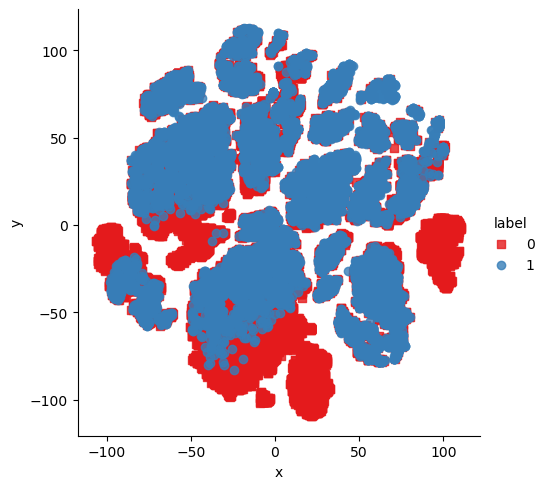

In [70]:
# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['s','o'])

In [ ]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.181s...
[t-SNE] Computed neighbors for 30000 samples in 8.252s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# for random forest model
confusion_matrix(y_test,y_pred)

In [ ]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
# creating a function to test questions

In [ ]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf.predict(query_point_creator(q1,q2))

In [ ]:
cv

In [ ]:
import pickle

pickle.dump(rf, open('model.pkl', 'wb'))
pickle.dump(cv, open('cv.pkl', 'wb'))